In [1]:
from tensorflow.keras.models import load_model

# Load a model from a file
model = load_model(r'C:\F-DRIVE\GIT\OncoDetect\Model\saved_model\best_model_M1_V2.keras')


In [2]:
# Save model architecture to JSON
model_json = model.to_json()
with open(r'C:\F-DRIVE\GIT\OncoDetect\Model\saved_model\model_architecture.json', 'w') as json_file:
    json_file.write(model_json)

# Save weights to H5 file
model.save_weights(r'C:\F-DRIVE\GIT\OncoDetect\Model\saved_model\model.weights.h5')


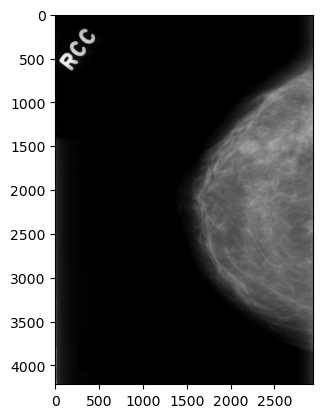

In [3]:
# load an image from dataset and display it
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(r'C:\F-DRIVE\GIT\OncoDetect\Data_set_preparation\Data\jpeg\1.3.6.1.4.1.9590.100.1.2.126082211045731020508108042042916052\1-240.jpg')
plt.imshow(img)
plt.show()

In [4]:
# Preprocess the image for prediction
img = cv2.resize(img, (224, 224))
img = np.reshape(img, [1, 224, 224, 3])

# Predict the image
prediction = model.predict(img)
print(prediction)
print(np.argmax(prediction))
print(np.max(prediction))

# Load the class labels and get the predicted class
class_labels = ['Benign', 'Malignant']
predicted_class = class_labels[np.argmax(prediction)]
print(predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
[[0. 1.]]
1
1.0
Malignant


In [ ]:
# import pandas as pd

# # load the mass dataset
# mass_train = pd.read_csv('C:\F-DRIVE\GIT\OncoDetect\Data_set_preparation\Data\csv\mass_case_description_train_set.csv')

# mass_train.head()

In [ ]:
# # find the image label (pathology) from the csv file
# image_path = r'C:\F-DRIVE\GIT\OncoDetect\Data_set_preparation\Data\jpeg\1.3.6.1.4.1.9590.100.1.2.126082211045731020508108042042916052\1-240.jpg'

# # Extract the DICOM ID from the image path
# dicom_id = image_path.split('\\')[-2]

# # Find the corresponding row in the CSV file
# matching_rows = mass_train[mass_train['image file path'].str.contains(dicom_id, na=False)]

# if not matching_rows.empty:
#     actual_pathology = matching_rows['pathology'].iloc[0]
#     print(f"Actual pathology: {actual_pathology}")
#     print(f"Model prediction: {predicted_class}")
#     print(f"Prediction matches actual: {actual_pathology.upper() == predicted_class.upper()}")
# else:
#     print("Image not found in the dataset")